# A Quick Introduction to Python

----

#### John Stachurski

#### Prepared for the CBC Computational Economics Workshop (May 2024)

-----

This notebook provides a super quick introduction to Python.

Participants who don't need it can either ask more advanced questions or sleep.

Participants who want a slower treatment can either

* slow us down by asking lots of questions, or
* review the first few [QuantEcon Python programming lectures](https://python-programming.quantecon.org/intro.html) after the class

## Example Task: Plotting a White Noise Process

Task: simulate and plot the white noise
process $ \epsilon_0, \epsilon_1, \ldots, \epsilon_T $, where each draw $ \epsilon_t $ is independent standard normal.


### Version 1

Here are a few lines of code that perform the task we set

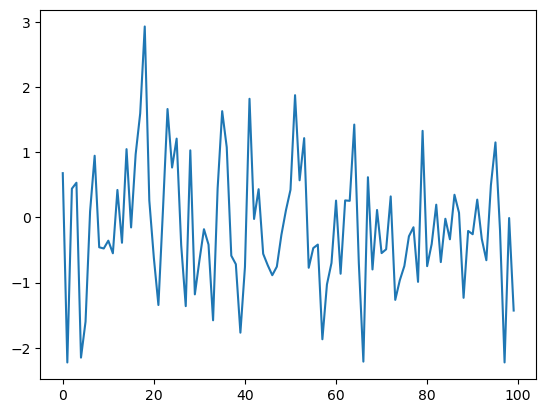

In [1]:
import numpy as np
import matplotlib.pyplot as plt   

ϵ_values = np.random.randn(100)   # 100 draws from N(0, 1)
plt.plot(ϵ_values)                # Plot draws
plt.show()

Let’s discuss some aspects of this program.

#### Imports

The first two lines

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import functionality from external code
libraries.

The first line imports [NumPy](https://python-programming.quantecon.org/numpy.html), a Python package for tasks like

- working with arrays (vectors and matrices)  
- common mathematical functions like `cos` and `sqrt`  
- generating random numbers  
- linear algebra, etc.  


After `import numpy as np` we have access to these attributes via the syntax `np.attribute`.

Here’s two more examples

In [3]:
np.sqrt(4)

2.0

In [4]:
np.log(4)

1.3862943611198906

#### Why So Many Imports?

The reason is that the core language is deliberately kept small, so that it’s easy to learn, maintain and improve.

When you want to do something interesting with Python, you almost always need
to import additional functionality.

#### Importing Names Directly

Recall this code that we saw above

In [5]:
import numpy as np
np.sqrt(4)

2.0

Here’s another way to access NumPy’s square root function

In [6]:
from numpy import sqrt
sqrt(4)

2.0

### A Version with a For Loop

Here’s a (less efficient) version that illustrates `for` loops and Python lists.

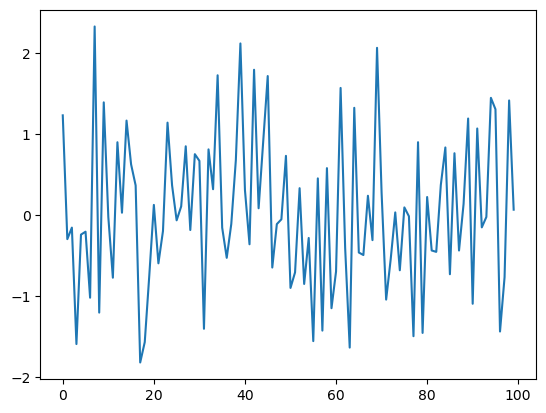

In [7]:
ts_length = 100
ϵ_values = []       # Empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

How does it work?

How do you like significant whitespace??

#### Lists


Consider the statement `ϵ_values = []`, which creates an empty list.

Lists are a native Python data structure used to group a collection of objects.

Here's another:

In [8]:
x = [10, 'foo', False]
type(x)

list

When adding a value to a list, we can use the syntax `list_name.append(some_value)`

In [9]:
x.append(2.5)
x

[10, 'foo', False, 2.5]

Here `append()` is what’s called a **method**, which is a function "attached to" an object -- in this case, the list `x`.


- Python objects such as lists, strings, etc. all have methods that are used to manipulate data contained in the object.  
- String objects have string methods, list objects have list methods, etc.

Another useful list method is `pop()`

In [10]:
x

[10, 'foo', False, 2.5]

In [11]:
x.pop()

2.5

In [12]:
x

[10, 'foo', False]

Lists in Python are zero-based (as in C, Java or Go), so the first element is referenced by `x[0]`

In [13]:
x[0]   # First element of x

10

In [14]:
x[1]   # Second element of x

'foo'

Who likes zero based lists/arrays?

### While Loops


For the purpose of illustration, let’s modify our program to use a `while` loop instead of a `for` loop.

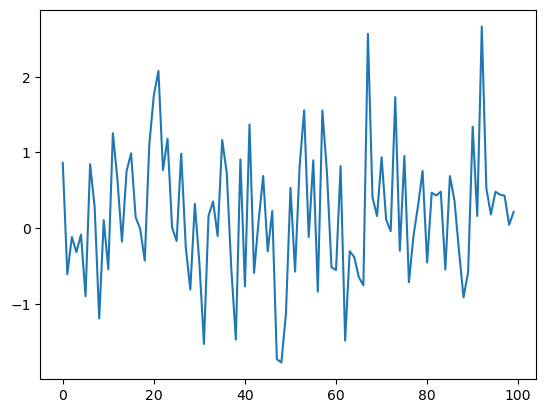

In [15]:
ts_length = 100
ϵ_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i = i + 1             # Equivalent: i += 1
plt.plot(ϵ_values)
plt.show()

How does it work?

**Exercise**

Plot the balance of a bank account over $0, \ldots, T$ when $T=50$.

* There are no withdraws 
* The initial balance is $ b_0 = 10 $ and the interest rate is $ r = 0.025$.

The balance updates from period $ t $ to $ t+1 $ according to $ b_{t+1} = (1 + r) b_t $.

Your task is to generate and plot the sequence $b_0, b_1, \ldots, b_T $.

You can use a Python list to store this sequence, or a NumPy array.

In the first case, start with

In [16]:
T = 50
b = []

In the second case, you can use a statement such as

In [17]:
T = 50
b = np.empty(T+1)   # Allocate memory to store all b_t

and then populate `b` in a for loop.

In [18]:
for i in range(12):
    print("Solution below.")

Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.


**Solution**

In [19]:
r = 0.025         # interest rate
T = 50            # end date

Here's the list-based solution

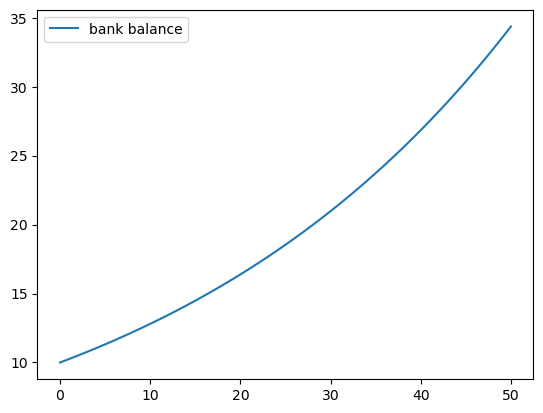

In [20]:
b = []
x = 10         # initial balance
for t in range(T):
    b.append(x)
    x = (1 + r) *x
b.append(x)
plt.plot(b, label='bank balance')
plt.legend()
plt.show()

And here's the NumPy array-based solution.

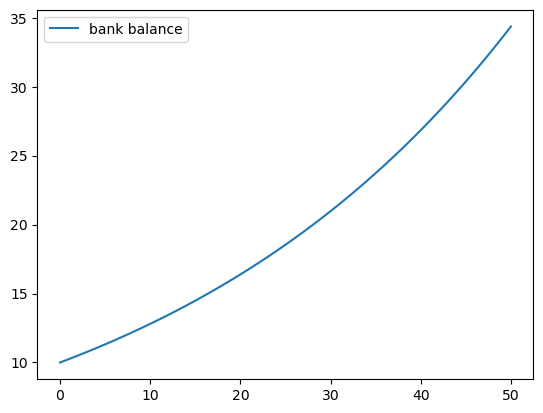

In [21]:
b = np.empty(T+1) # an empty NumPy array, to store all b_t
b[0] = 10         # initial balance
for t in range(T):
    b[t+1] = (1 + r) * b[t]

plt.plot(b, label='bank balance')
plt.legend()
plt.show()

**Exercise**

Simulate and plot the correlated time series

$$
    x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
    \quad \text{where} \quad
    x_0 = 0
    \quad \text{and} \quad t = 0,\ldots,T
$$

were $ \{\epsilon_t\} $ is IID and standard normal.

In your solution, restrict your import statements to

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Set $ T=200 $ and $ \alpha = 0.9 $.

In [23]:
for i in range(12):
    print("Solution below.")

Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.


**Solution**


Here’s one solution.

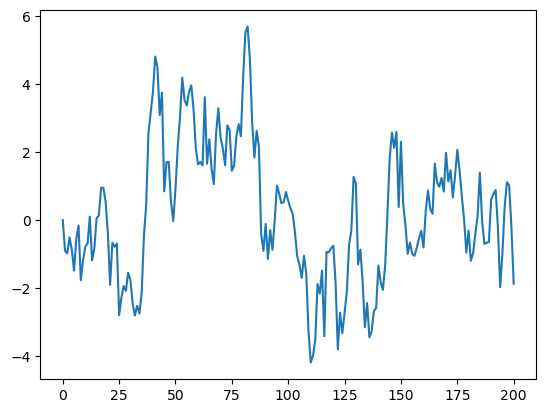

In [24]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * x[t] + np.random.randn()

plt.plot(x)
plt.show()

**Exercise** 

Plot three simulated time series,
one for each of the cases $ \alpha=0 $, $ \alpha=0.8 $ and $ \alpha=0.98 $.

Use a `for` loop to step through the $ \alpha $ values.

If you can, add a legend, to help distinguish between the three time series.

- If you call the `plot()` function multiple times before calling `show()`, all of the lines you produce will end up on the same figure.  
- For the legend, noted that suppose `var = 42`, the expression `f'foo{var}'` evaluates to `'foo42'`.

In [25]:
for i in range(12):
    print("Solution below.")

Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.


**Solution**

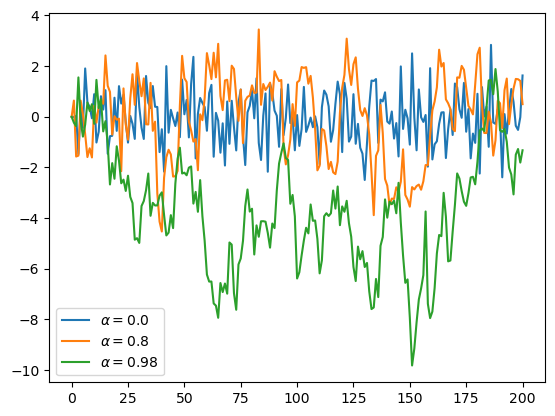

In [26]:
α_values = [0.0, 0.8, 0.98]
T = 200
x = np.empty(T+1)

for α in α_values:
    x[0] = 0
    for t in range(T):
        x[t+1] = α * x[t] + np.random.randn()
    plt.plot(x, label=f'$\\alpha = {α}$')

plt.legend()
plt.show()

## Conditional execution

One important aspect of essentially all programming languages is branching and
conditions.

In Python, conditions are usually implemented with if-else syntax.

Here’s an example, that prints -1 for each negative number in an array and 1
for each nonnegative number

In [27]:
numbers = [-9, 2.3, -11, 0]

In [28]:
for x in numbers:
    if x < 0:
        print(-1)
    else:
        print(1)

-1
1
-1
1


**Exercise**

Simulate and plot the correlated time series

$$
    x_{t+1} = \alpha \, |x_t| + \epsilon_{t+1}
    \quad \text{where} \quad
    x_0 = 0
    \quad \text{and} \quad t = 0,\ldots,T
$$

were $ \{\epsilon_t\} $ is IID and standard normal.  Use

In [29]:
α = 0.9
T = 200

Do not use an existing function such as `abs()` or `np.abs()`
to compute the absolute value.

Replace this existing function with an if-else condition.

In [30]:
for i in range(12):
    print("Solution below.")

Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.


**Solution**

Here’s one way:

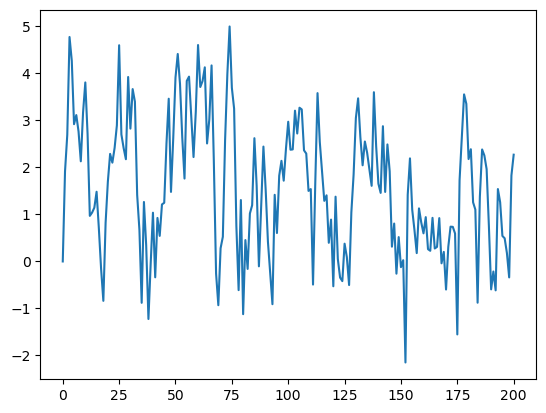

In [31]:
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    if x[t] < 0:
        abs_x = - x[t]
    else:
        abs_x = x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

Here’s a shorter way to write the same thing:

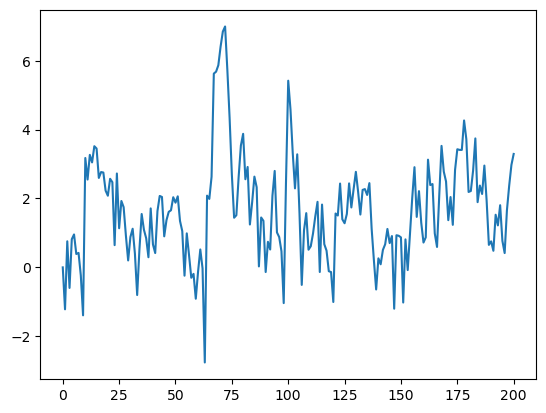

In [32]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    abs_x = - x[t] if x[t] < 0 else x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

## Data Types


Computer programs typically keep track of a range of data types.

For example, `1.5` is a floating point number, while `1` is an integer.

Another data type is Boolean values, which can be either `True` or `False`

In [33]:
x = True
x

True

We can check the type of any object in memory using the `type()` function.

In [34]:
type(x)

bool

In the next line of code, the interpreter evaluates the expression on the right of = and binds y to this value

In [35]:
y = 100 < 10
y

False

In [36]:
type(y)

bool

In arithmetic expressions, `True` is converted to `1` and `False` is converted `0`.

This is called **Boolean arithmetic** and is often useful in programming.

Here are some examples

In [37]:
x + y

1

In [38]:
x * y

0

In [39]:
bools = [True, True, False, True]  # List of Boolean values
sum(bools)

3

### Containers

Python has several basic types for storing collections of (possibly heterogeneous) data.

We have already discussed lists.

A related data type is **tuples**, which are "immutable" lists

In [40]:
x = ('a', 'b')  # Parentheses instead of the square brackets
x = 'a', 'b'    # Or no brackets --- the meaning is identical
x

('a', 'b')

In [41]:
type(x)

tuple

In Python, an object is called **immutable** if, once created, the object cannot be changed.

Conversely, an object is **mutable** if it can still be altered after creation.

Python lists are mutable

In [42]:
x = [1, 2]
x[0] = 10
x

[10, 2]

But tuples are not

In [43]:
x = (1, 2)
#x[0] = 10  # Generates a TypeError

Tuples (and lists) can be “unpacked” as follows

In [44]:
integers = (10, 20, 30)
x, y, z = integers
x

10

In [45]:
y

20

#### Slice Notation


To access multiple elements of a sequence (a list, a tuple or a string), you can use Python’s slice
notation.

For example,

In [46]:
a = ["a", "b", "c", "d", "e"]
a[1:]

['b', 'c', 'd', 'e']

In [47]:
a[1:3]

['b', 'c']

The rule is `a[m:n]` returns `n - m` elements, starting at `a[m]`.

Also:

In [48]:
a[-2:]  # Last two elements of the list

['d', 'e']

In [49]:
s = 'foobar'
s[-3:]  # Last three elements

'bar'

## Iterating


One of the most important tasks in computing is stepping through a
sequence of data and performing a given action.

One of Python’s strengths is its simple, flexible interface to iteration.

### Looping over Different Objects

Many Python objects are "iterable", in the sense that they can be looped over.

To give an example, let’s write the file us_cities.txt, which lists US cities and their population, to the present working directory.

In [50]:
%%writefile us_cities.txt
new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229

Writing us_cities.txt


Suppose that we want to make the information more readable, by capitalizing names and adding commas to mark thousands.

The program below reads the data in and makes the conversion:

In [51]:
data_file = open('us_cities.txt', 'r')
for line in data_file:
    city, population = line.split(':')         # Tuple unpacking
    city = city.title()                        # Capitalize city names
    population = f'{int(population):,}'        # Add commas to numbers
    print(city.ljust(15) + population)
data_file.close()

New York       8,244,910
Los Angeles    3,819,702
Chicago        2,707,120
Houston        2,145,146
Philadelphia   1,536,471
Phoenix        1,469,471
San Antonio    1,359,758
San Diego      1,326,179
Dallas         1,223,229


### Looping without Indices

Python tends to favor looping without explicit indexing.

For example,

In [52]:
x_values = [1, 2, 3]  # Some iterable x
for x in x_values:
    print(x * x)

1
4
9


is preferred to

In [53]:
for i in range(len(x_values)):
    print(x_values[i] * x_values[i])

1
4
9


Python provides some facilities to simplify looping without indices.

One is `zip()`, which is used for stepping through pairs from two sequences.

For example, try running the following code

In [54]:
countries = ('Japan', 'Korea', 'China')
cities = ('Tokyo', 'Seoul', 'Beijing')
for country, city in zip(countries, cities):
    print(f'The capital of {country} is {city}')

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


If we actually need the index from a list, one option is to use `enumerate()`.

To understand what `enumerate()` does, consider the following example

In [55]:
letter_list = ['a', 'b', 'c']
for index, letter in enumerate(letter_list):
    print(f"letter_list[{index}] = '{letter}'")

letter_list[0] = 'a'
letter_list[1] = 'b'
letter_list[2] = 'c'


### List Comprehensions

[List comprehensions](https://en.wikipedia.org/wiki/List_comprehension) are an elegant Python tool for creating lists.

Consider the following example, where the list comprehension is on the
right-hand side of the second line

In [56]:
animals = ['dog', 'cat', 'bird']
plurals = [animal + 's' for animal in animals]
plurals

['dogs', 'cats', 'birds']

Here’s another example

In [57]:
range(8)

range(0, 8)

In [58]:
doubles = [2 * x for x in range(8)]
doubles

[0, 2, 4, 6, 8, 10, 12, 14]

## Comparisons and Logical Operators


### Comparisons

In Python we can chain inequalities

In [59]:
1 < 2 < 3

True

In [60]:
1 <= 2 <= 3

True

When testing for equality we use `==`

In [61]:
x = 1    # Assignment
x == 2   # Comparison

False

For “not equal” use `!=`

In [62]:
1 != 2

True

### Combining Expressions

We can combine expressions using `and`, `or` and `not`.

These are the standard logical connectives (conjunction, disjunction and denial)

In [63]:
1 < 2 and 'f' in 'foo'

True

In [64]:
1 < 2 and 'g' in 'foo'

False

In [65]:
1 < 2 or 'g' in 'foo'

True

In [66]:
not not True

True

### Coding Style and Documentation

A consistent coding style make code easier to understand and maintain.

You can find Python programming philosophy by typing `import this` at the prompt.

See also the Python style guide [PEP8](https://www.python.org/dev/peps/pep-0008/).

**Exercise**

Part 1: Given two numeric lists or tuples `x_vals` and `y_vals` of equal length, compute
their inner product using `zip()`.

Part 2: In one line, count the number of even numbers in 0,…,99.


(Hint: `x % 2` returns 0 if `x` is even, 1 otherwise.)

Part 3: Given `pairs = ((2, 5), (4, 2), (9, 8), (12, 10))`, count the number of pairs `(a, b)`
such that both `a` and `b` are even.

In [67]:
for i in range(12):
    print("Solution below.")

Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.


**Part 1 Solution:**

Here’s one possible solution

In [68]:
x_vals = [1, 2, 3]
y_vals = [1, 1, 1]
sum([x * y for x, y in zip(x_vals, y_vals)])

6

This also works

In [69]:
sum(x * y for x, y in zip(x_vals, y_vals))

6

**Part 2 Solution:**

One solution is

In [70]:
sum([x % 2 == 0 for x in range(100)])

50

This also works:

In [71]:
sum(x % 2 == 0 for x in range(100))

50

Some less natural alternatives that nonetheless help to illustrate the
flexibility of list comprehensions are

In [72]:
len([x for x in range(100) if x % 2 == 0])

50

and

In [73]:
sum([1 for x in range(100) if x % 2 == 0])

50

**Part 3 Solution:**

Here’s one possibility

In [74]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum([x % 2 == 0 and y % 2 == 0 for x, y in pairs])

2

## Defining Functions

### Basic Syntax

Here’s a very simple Python function

In [75]:
def f(x):
    return 2 * x + 1

Now that we’ve defined this function, let’s *call* it and check whether it does what we expect:

In [76]:
f(1)   

3

In [77]:
f(10)

21

Here’s a longer function, that computes the absolute value of a given number.

(Such a function already exists as a built-in, but let’s write our own for the
exercise.)

In [78]:
def new_abs_function(x):
    if x < 0:
        abs_value = -x
    else:
        abs_value = x
    return abs_value

Let’s call it to check that it works:

In [79]:
new_abs_function(3)

3

In [80]:
new_abs_function(-3)

3

Note that a function can have arbitrarily many `return` statements (including zero).

Functions without a return statement automatically return the special Python object `None`.

**Exercise**

Write a function that takes a string as an argument and returns the number of capital letters in the string.

(Hint:`'foo'.upper()` returns `'FOO'`.)

In [81]:
for i in range(12):
    print("Solution below.")

Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.


**Solution:**

Here’s one solution:

In [82]:
def count_upper_case(string):
    count = 0
    for letter in string:
        if letter == letter.upper() and letter.isalpha():
            count += 1
    return count

count_upper_case('The Rain in Spain')

3

Alternatively,

In [83]:
def count_upper_case(s):
    return sum([c.isupper() for c in s])

count_upper_case('The Rain in Spain')

3

### Keyword Arguments


The following example illustrates the syntax

In [84]:
def f(x, a=1, b=1):
    return a + b * x

The keyword argument values we supplied in the definition of `f` become the default values

In [85]:
f(2)

3

They can be modified as follows

In [86]:
f(2, a=4, b=5)

14

### The Flexibility of Python Functions


- Any number of functions can be defined in a given file.  
- Functions can be (and often are) defined inside other functions.  
- Any object can be passed to a function as an argument, including other functions.  
- A function can return any kind of object, including functions.

### One-Line Functions: `lambda`


The `lambda` keyword is used to create simple functions on one line.

For example,

In [87]:
def f(x):
    return x**3

is equivalent to.

In [88]:
f = lambda x: x**3

One use case is "anonymous" functions

In [89]:
from scipy.integrate import quad
quad(lambda x: x**3, 0, 2)

(4.0, 4.440892098500626e-14)

### Random Draws

Consider again the code

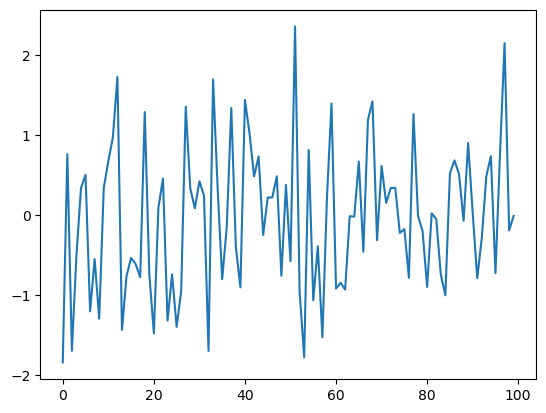

In [90]:
ts_length = 100
ϵ_values = []   # empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

We can break this down as follows:

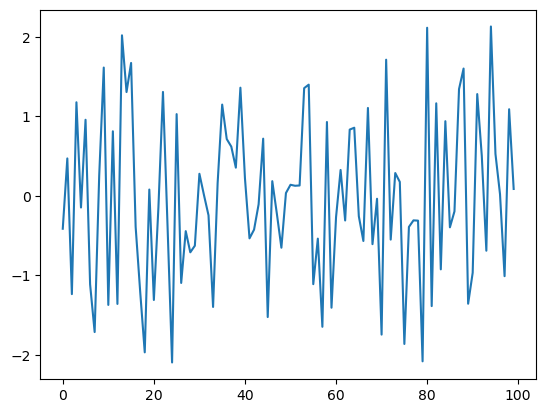

In [91]:
def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100)
plt.plot(data)
plt.show()

Here's an alternative where we pass a function to a function:

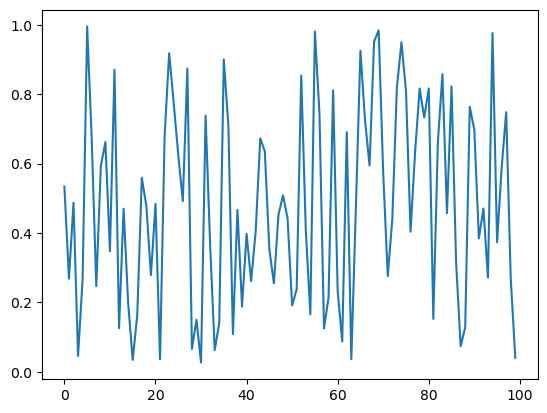

In [92]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

**Exercise**

The binomial random variable $Y$ gives the number of successes in $ n $ binary trials, where each trial
succeeds with probability $ p $.

Without any import besides `from numpy.random import uniform`, write a function
`binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $.

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `True` with probability $ p $.

In [93]:
for i in range(12):
    print("Solution below.")

Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.
Solution below.


**Solution** 

Here's one solution:

In [94]:
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count = count + 1    # Or count += 1
    return count

binomial_rv(10, 0.5)

5

## OOP: Objects and Methods


The traditional programming paradigm (Fortran, C, MATLAB, etc.) is called **procedural**.


Another important paradigm is **object-oriented programming** (OOP) 

In the OOP paradigm, data and functions are bundled together into “objects” — and functions in this context are referred to as **methods**.

Methods are called on to transform the data contained in the object.

- Think of a Python list that contains data and has methods such as `append()` and `pop()` that transform the data.  

A third paradigm is **functional programming** 

* Built on the idea of composing functions.
* We'll discuss this more when we get to JAX

Python is a pragmatic language that blends object-oriented, functional and procedural styles.

But at a foundational level, Python *is* object-oriented.

By this we mean that, in Python, *everything is an object*.


### Objects


In Python, an *object* is a collection of data and instructions held in computer memory that consists of

1. a type  
1. a unique identity  
1. data (i.e., content, reference count)  
1. methods

#### Type


Python provides for different types of objects, to accommodate different categories of data.

For example

In [95]:
s = 'This is a string'
type(s)

str

In [96]:
x = 42   # Now let's create an integer
type(x)

int

The type of an object matters for many expressions.

For example, the addition operator between two strings means concatenation

In [97]:
'300' + 'cc'

'300cc'

On the other hand, between two numbers it means ordinary addition

In [98]:
300 + 400

700

Consider the following expression

In [99]:
'300' + 400

TypeError: can only concatenate str (not "int") to str

Here we are mixing types, and it’s unclear to Python whether the user wants to

Python is *strongly typed* -- throws an error rather than trying to perform
hidden type conversion.

#### Identity


In Python, each object has a unique identifier, which helps Python (and us) keep track of the object.

The identity of an object can be obtained via the `id()` function

In [100]:
y = 2.5
z = 2.5
id(y)

140695955372848

In [101]:
id(z)

140694855087376

In this example, `y` and `z` happen to have the same value (i.e., `2.5`), but they are not the same object.

The identity of an object is in fact just the address of the object in memory.

**Question** Why is the following case different??!

In [102]:
a = 10
b = 10
id(a)

8908168

In [103]:
id(b)

8908168

#### Object Content: Data and Attributes


If we set `x = 42` then we create an object of type `int` that contains
the data `42`.

In fact, it contains more, as the following example shows

In [104]:
x = 42
x

42

In [105]:
x.imag

0

In [106]:
x.__class__

int

When Python creates this integer object, it stores with it various auxiliary information, such as the imaginary part, and the type.

Any name following a dot is called an *attribute* of the object to the left of the dot.

- e.g.,`imag` and `__class__` are attributes of `x`.  


We see from this example that objects have attributes that contain auxiliary information.

They also have attributes that act like functions, called *methods*.

These attributes are important, so let’s discuss them in-depth.

### Methods


Methods are *functions that are bundled with objects*.

Formally, methods are attributes of objects that are **callable** – i.e., attributes that can be called as functions

In [107]:
x = ['foo', 'bar']
callable(x.append)

True

In [108]:
callable(x.__doc__)

False

Methods typically act on the data contained in the object they belong to, or combine that data with other data

In [109]:
x = ['a', 'b']
x.append('c')
x

['a', 'b', 'c']

In [110]:
s = 'This is a string'
s.upper()

'THIS IS A STRING'

In [111]:
s.lower()

'this is a string'

In [112]:
s.replace('This', 'That')

'That is a string'

A great deal of Python functionality is organized around method calls.

For example, consider the following piece of code

In [113]:
x = ['a', 'b']
x[0] = 'aa'  # Item assignment using square bracket notation
x

['aa', 'b']

It doesn’t look like there are any methods used here, but in fact the square bracket assignment notation is just a convenient interface to a method call.

What actually happens is that Python calls the `__setitem__` method, as follows

In [114]:
x = ['a', 'b']
x.__setitem__(0, 'aa')  # Equivalent to x[0] = 'aa'
x

['aa', 'b']

(If you wanted to you could modify the `__setitem__` method, so that square bracket assignment does something totally different)

## Inspection Using Rich

There’s a nice package called [rich](https://github.com/Textualize/rich) that
helps us view the contents of an object.

For example,

In [115]:
#!pip install rich   # Uncomment if necessary

In [116]:
from rich import inspect
x = 10
inspect(x)

╭────── <class 'int'> ───────╮
│ int([x]) -> integer        │
│ int(x, base=10) -> integer │
│                            │
│ ╭────────────────────────╮ │
│ │ 10                     │ │
│ ╰────────────────────────╯ │
│                            │
│ denominator = 1            │
│        imag = 0            │
│   numerator = 10           │
│        real = 10           │
╰────────────────────────────╯

If we want to see the methods as well, we can use

In [117]:
inspect(x, methods=True)

╭───────────────────────────────────────────────── <class 'int'> ─────────────────────────────────────────────────╮
│ int([x]) -> integer                                                                                             │
│ int(x, base=10) -> integer                                                                                      │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ 10                                                                                                          │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│      denominator = 1                                                                                            │
│             imag = 0                                                                                            │
│        numerator = 10                                                                                           │
│             real = 10                                                                                           │
│ as_integer_ratio = def as_integer_ratio(): Return integer ratio.                                                │
│        bit_count = def bit_count(): Number of ones in the binary representation of the absolute value of self.  │
│       bit_length = def bit_length(): Number of bits necessary to represent self in binary.                      │
│        conjugate = def conjugate(...) Returns self, the complex conjugate of any int.                           │
│       from_bytes = def from_bytes(bytes, byteorder='big', *, signed=False): Return the integer represented by   │
│                    the given array of bytes.                                                                    │
│         to_bytes = def to_bytes(length=1, byteorder='big', *, signed=False): Return an array of bytes           │
│                    representing an integer.                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In fact there are still more methods, as you can see if you execute `inspect(10, all=True)`.

## Names and Namespaces

### Variable Names in Python


Consider the Python statement

In [118]:
x = 42

In Python, `x` is called a **name**, and the statement `x = 42` **binds** the name `x` to the integer object `42`.

Under the hood, this process of binding names to objects is implemented as a dictionary—more about this in a moment.

There is no problem binding two or more names to the one object, regardless of what that object is

In [119]:
def f(string):      # Create a function called f
    print(string)   # that prints any string it's passed

g = f
id(g) == id(f)

True

In [120]:
g('test')

test


What happens when the number of names bound to an object goes to zero?

Here’s an example of this situation, where the name `x` is first bound to one object and then **rebound** to another

In [121]:
x = 'foo'
id(x)
x = 'bar'  
id(x)

140695979266224

In this case, after we rebind `x` to `'bar'`, no names bound are to the first object `'foo'`.

This releases `'foo'` to be garbage collected.

In other words, the memory slot that stores that object is deallocated and returned to the operating system.

### Namespaces


Recall from the preceding discussion that the statement

In [122]:
x = 42

binds the name `x` to the integer object on the right-hand side.

This process of binding `x` to the correct object is implemented as a dictionary.

This dictionary is called a namespace.

Python uses multiple namespaces, creating them on the fly as necessary.

For example, every time we import a module, Python creates a namespace for that module.

To see this in action, suppose we write a script `mathfoo.py` with a single line

In [123]:
%%file mathfoo.py
pi = 'foobar'

Writing mathfoo.py


Let's import this "module"

In [124]:
import mathfoo

Next let’s import the `math` module from the standard library

In [125]:
import math

Both of these modules have an attribute called `pi`

In [126]:
math.pi

3.141592653589793

In [127]:
mathfoo.pi

'foobar'

These two different bindings of `pi` exist in different namespaces, each one implemented as a dictionary.

If you wish, you can look at the dictionary directly, using `module_name.__dict__`.

In [128]:
import math

math.__dict__.items()

dict_items([('__name__', 'math'), ('__doc__', 'This module provides access to the mathematical functions\ndefined by the C standard.'), ('__package__', ''), ('__loader__', <_frozen_importlib_external.ExtensionFileLoader object at 0x7ff6573c3710>), ('__spec__', ModuleSpec(name='math', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7ff6573c3710>, origin='/home/john/anaconda3/lib/python3.11/lib-dynload/math.cpython-311-x86_64-linux-gnu.so')), ('acos', <built-in function acos>), ('acosh', <built-in function acosh>), ('asin', <built-in function asin>), ('asinh', <built-in function asinh>), ('atan', <built-in function atan>), ('atan2', <built-in function atan2>), ('atanh', <built-in function atanh>), ('cbrt', <built-in function cbrt>), ('ceil', <built-in function ceil>), ('copysign', <built-in function copysign>), ('cos', <built-in function cos>), ('cosh', <built-in function cosh>), ('degrees', <built-in function degrees>), ('dist', <built-in function dist>), ('erf', <bui

As you know, we access elements of the namespace using the dotted attribute notation

In [129]:
math.pi

3.141592653589793

This is entirely equivalent to `math.__dict__['pi']`

In [130]:
math.__dict__['pi'] 

3.141592653589793

Another way to view the namespace of `math` is

In [131]:
vars(math)

{'__name__': 'math',
 '__doc__': 'This module provides access to the mathematical functions\ndefined by the C standard.',
 '__package__': '',
 '__loader__': <_frozen_importlib_external.ExtensionFileLoader at 0x7ff6573c3710>,
 '__spec__': ModuleSpec(name='math', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7ff6573c3710>, origin='/home/john/anaconda3/lib/python3.11/lib-dynload/math.cpython-311-x86_64-linux-gnu.so'),
 'acos': <function math.acos(x, /)>,
 'acosh': <function math.acosh(x, /)>,
 'asin': <function math.asin(x, /)>,
 'asinh': <function math.asinh(x, /)>,
 'atan': <function math.atan(x, /)>,
 'atan2': <function math.atan2(y, x, /)>,
 'atanh': <function math.atanh(x, /)>,
 'cbrt': <function math.cbrt(x, /)>,
 'ceil': <function math.ceil(x, /)>,
 'copysign': <function math.copysign(x, y, /)>,
 'cos': <function math.cos(x, /)>,
 'cosh': <function math.cosh(x, /)>,
 'degrees': <function math.degrees(x, /)>,
 'dist': <function math.dist(p, q, /)>,
 'erf': <func

Notice the special names `__doc__` and `__name__`.

These are initialized in the namespace when any module is imported

- `__doc__` is the doc string of the module  
- `__name__` is the name of the module

In [132]:
print(math.__doc__)

This module provides access to the mathematical functions
defined by the C standard.


In [133]:
math.__name__

'math'

### Interactive Sessions


In Python, **all** code executed by the interpreter runs in some module.

What about commands typed at the prompt?

These are also regarded as being executed within a module — in this case, a module called `__main__`.

To check this, we can look at the current module name via the value of `__name__` given at the prompt

In [134]:
print(__name__)

__main__


When we run a script using IPython’s `run` command, the contents of the file are executed as part of `__main__` too.

To see this, let’s create a file `mod.py` that prints its own `__name__` attribute

In [135]:
%%file mod.py
print(__name__)

Writing mod.py


Now let’s look at two different ways of running it in IPython

In [136]:
import mod  # Standard import

mod


In [137]:
%run mod.py  # Run interactively

__main__


In the second case, the code is executed as part of `__main__`, so `__name__` is equal to `__main__`.

To see the contents of the namespace of `__main__` we use `vars()` rather than `vars(__main__)`.

If you do this in IPython, you will see a whole lot of variables that IPython
needs, and has initialized when you started up your session.

If you prefer to see only the variables you have initialized, use `%whos`

In [138]:
x = 2
y = 3

import numpy as np

%whos

Variable           Type                          Data/Info
----------------------------------------------------------
T                  int                           200
a                  int                           10
abs_x              float64                       2.9749532292639698
animals            list                          n=3
b                  int                           10
binomial_rv        function                      <function binomial_rv at 0x7ff612e7c4a0>
bools              list                          n=4
cities             tuple                         n=3
city               str                           Beijing
count_upper_case   function                      <function count_upper_case at 0x7ff61ac69d00>
countries          tuple                         n=3
country            str                           China
data               list                          n=100
data_file          TextIOWrapper                 <_io.TextIOWrapper name='<...>ode='r' encodi

### Global and local namespaces

The **global namespace** is *the namespace of the module currently being executed*.

For example, suppose that we start the interpreter and begin making assignments.

We are now working in the module `__main__`, and hence the namespace for `__main__` is the global namespace.

When we call a function, the interpreter creates a **local namespace** for that function, and registers the variables in that namespace.

Variables in the local namespace are called *local variables*.

After the function returns, the namespace is deallocated and lost.

While the function is executing, we can view the contents of the local namespace with `locals()`.

For example, consider

In [139]:
def f(x):
    a = 2
    print(locals())
    return a * x

Now let’s call the function

In [140]:
f(1)

{'x': 1, 'a': 2}


2

### The `__builtins__` Namespace


We have been using various built-in functions, such as `max(), dir(), str(), list(), len(), range(), type()`, etc.

How does access to these names work?

- These definitions are stored in a module called `__builtin__`.  
- They have their own namespace called `__builtins__`.

In [141]:
# Show the first 10 names in `__builtins__`
dir(__builtins__)[0:10]

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BaseExceptionGroup',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError']

We can access elements of the namespace as follows

In [142]:
__builtins__.max

<function max>

But `__builtins__` is special, because we can always access them directly as well

In [143]:
max

<function max>

In [144]:
__builtins__.max == max

True

The next section explains how this works …

## Name Resolution


Namespaces are great because they help us organize variable names.

(Type `import this` at the prompt and look at the last item that’s printed)

At any point of execution, there are at least two namespaces that can be accessed directly.

(“Accessed directly” means without using a dot, as in  `pi` rather than `math.pi`)

These namespaces are

- The global namespace (of the module being executed)  
- The builtin namespace  


If the interpreter is executing a function, then the directly accessible namespaces are

- The local namespace of the function  
- The global namespace (of the module being executed)  
- The builtin namespace  


Sometimes functions are defined within other functions, like so

In [145]:
def f():
    a = 2
    def g():
        b = 4
        print(a * b)
    g()

Here `f` is the *enclosing function* for `g`, and each function gets its
own namespaces.

Now we can give the rule for how namespace resolution works:

The order in which the interpreter searches for names is

1. the local namespace (if it exists)  
1. the hierarchy of enclosing namespaces (if they exist)  
1. the global namespace  
1. the builtin namespace  


If the name is not in any of these namespaces, the interpreter raises a `NameError`.

This is called the **LEGB rule** (local, enclosing, global, builtin).

### Mutable Versus Immutable Parameters

This is a good time to say a little more about mutable vs immutable objects.

Consider the code segment

In [146]:
def f(x):
    x = x + 1
    return x

x = 1
print(f(x), x)

2 1


We now understand what will happen here: The code prints `2` as the value of `f(x)` and `1` as the value of `x`.

First `f` and `x` are registered in the global namespace.

The call `f(x)` creates a local namespace and adds `x` to it, bound to `1`.

Next, this local `x` is rebound to the new integer object `2`, and this value is returned.

None of this affects the global `x`.

However, it’s a different story when we use a **mutable** data type such as a list

In [147]:
def f(x):
    x[0] = x[0] + 1
    return x

x = [1]
print(f(x), x)

[2] [2]


Here’s what happens

- `f` is registered as a function in the global namespace  
- `x` is bound to `[1]` in the global namespace  
- The call `f(x)`  
  - Creates a local namespace  
  - Adds `x` to the local namespace, bound to `[1]`  
  - Mutates the data in the list `[1]`, changing it to `[2]`
  - Returns the mutated list
 
Global `x` is now bound to the mutated list `[2]`